Ridge MAE:  0.162829976437694
MLP1 MAE:  0.0680414073796843
MLP2 MAE:  0.09780718203877478


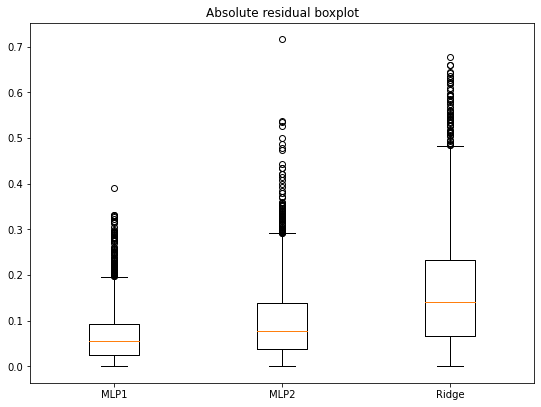

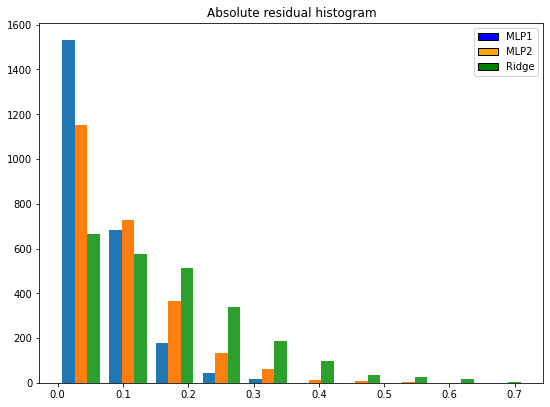

MLP1 iterations:  452
MLP2 iterations:  77


In [1]:
"""Consider the following three regressors applied on kin8nm.arff data (available at the webpage):
− linear regression with Ridge regularization term of 0.1
− two MLPs – 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 – each with two hidden layers of size 10, hyperbolic tangent
function as the activation function of all nodes, a maximum of 500 iterations, and a fixed
seed (random_state=0). 𝑀𝐿𝑃1 should be parameterized with early stopping while 𝑀𝐿𝑃2
should not consider early stopping. Remaining parameters (e.g., loss function, batch size,
regularization term, solver) should be set as default.
Using a 70-30 training-test split with a fixed seed (random_state=0):
Compute the MAE of the three regressors: linear regression, 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2.
Plot the residues (in absolute value) using two visualizations: boxplots and histograms."""

from matplotlib import colors
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
X = df.drop('y', axis=1)
y = df['y']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)
print('Ridge MAE: ', metrics.mean_absolute_error(y_test, rr_pred))

mlp1 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=0, activation='tanh', early_stopping=True)
mlp1.fit(X_train.values, y_train)
mlp1_pred = mlp1.predict(X_test.values)
print('MLP1 MAE: ', metrics.mean_absolute_error(y_test, mlp1_pred))

mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=0, activation='tanh')
mlp2.fit(X_train.values, y_train)
mlp2_pred = mlp2.predict(X_test.values)
print('MLP2 MAE: ', metrics.mean_absolute_error(y_test, mlp2_pred))

res_mlp1 = abs(y_test - mlp1_pred)
res_mlp2 = abs(y_test - mlp2_pred)
res_rr = abs(y_test - rr_pred)
d = [res_mlp1, res_mlp2, res_rr]

fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(d, labels=['MLP1', 'MLP2', 'Ridge'])
plt.title('Absolute residual boxplot')
plt.show()

colors = ['blue', 'orange', 'green']
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(d)
plt.title('Absolute residual histogram')
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ['MLP1', 'MLP2', 'Ridge']
plt.legend(handles, labels)
plt.show()

# Iterations
print('MLP1 iterations: ', mlp1.n_iter_)
print('MLP2 iterations: ', mlp2.n_iter_)